In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patients = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
patients.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
patients.shape

(299, 13)

In [6]:
patients.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df_0 = patients[patients['DEATH_EVENT'] == 0]

In [11]:
df_1 = patients[patients['DEATH_EVENT'] == 1]

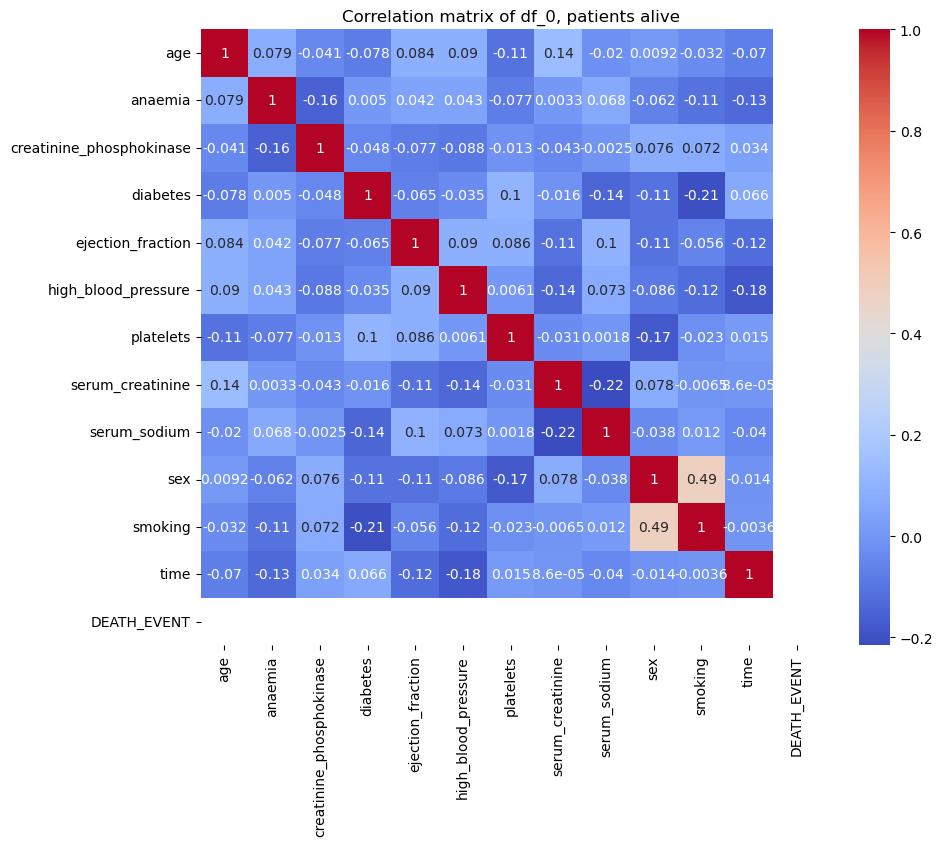

<Figure size 640x480 with 0 Axes>

In [20]:
#Correlation Matrix

m0 = df_0.corr()
plt.figure(figsize=(10,8))
sns.heatmap(m0, annot=True, cmap='coolwarm')

plt.title('Correlation matrix of df_0, patients alive')
plt.show()

plt.savefig('m0.jpg')

(a) which features have the highest correlation for surviving
patients?
: Smoking and sex.

(b) which features have the lowest correlation for surviving
patients?
: serum_creatinine and time
(c) which features have the highest correlation for deceased
patients?
Sex and Smoking
(d) which features have the lowest correlation for deceased
patients?
: Serum_creatinine and time
(e) are results the same for both cases?
: Yes

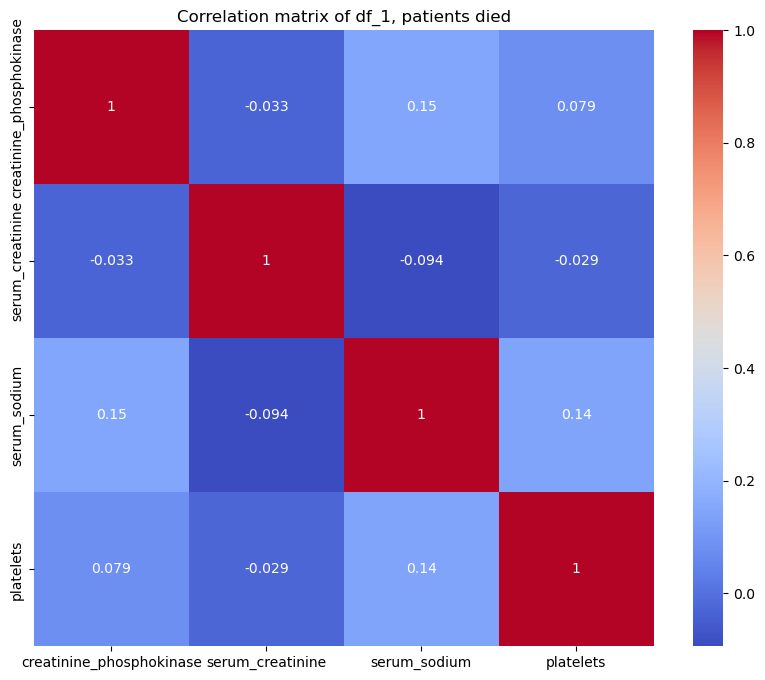

<Figure size 640x480 with 0 Axes>

In [75]:
#Correlation Matrix

m1 = df_1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(m1, annot=True,cmap='coolwarm')

plt.title('Correlation matrix of df_1, patients died')
plt.show()

plt.savefig('m1.jpg')

In [22]:
np.fill_diagonal(m1.values, np.nan)

# Identify the highest correlation (absolute value)
highest_corr = m1.unstack().dropna().abs().idxmax()
highest_corr_value = m1.unstack().dropna().loc[highest_corr]

# Identify the lowest correlation (absolute value)
lowest_corr = m1.unstack().dropna().abs().idxmin()
lowest_corr_value = m1.unstack().dropna().loc[lowest_corr]

highest_corr, highest_corr_value, lowest_corr, lowest_corr_value

(('sex', 'smoking'),
 0.4869903410906405,
 ('serum_creatinine', 'time'),
 8.641941575694844e-05)

In [31]:

features = ['creatinine_phosphokinase','serum_creatinine','serum_sodium','platelets']

# Calculate the mean and standard deviation for each feature in df_0, df_1, and the entire dataset
stats_0 = df_0[features].agg(['mean', 'std']).round(2)
stats_1 = df_1[features].agg(['mean', 'std']).round(2)
stats_all = patients[features].agg(['mean', 'std']).round(2)

# Rename the index for clarity in the final table
stats_0.index = ['μ(0)', 'σ(0)']
stats_1.index = ['μ(1)', 'σ(1)']
stats_all.index = ['μ(all)', 'σ(all)']

# Combine the results into a single DataFrame for the table
summary_table = pd.concat([stats_0, stats_1, stats_all]).T

# Adjusting the table for the desired format
summary_table.reset_index(inplace=True)
summary_table.columns = ['feature', 'μ(0)', 'σ(0)', 'μ(1)', 'σ(1)', 'μ(all)', 'σ(all)']
summary_formatted = summary_table.melt(id_vars=["feature"], var_name="class", value_name="value")

summary_table, summary_formatted


(                    feature       μ(0)      σ(0)       μ(1)      σ(1)  \
 0  creatinine_phosphokinase     540.05    753.80     670.20   1316.58   
 1          serum_creatinine       1.18      0.65       1.84      1.47   
 2              serum_sodium     137.22      3.98     135.38      5.00   
 3                 platelets  266657.49  97531.20  256381.04  98525.68   
 
       μ(all)    σ(all)  
 0     581.84    970.29  
 1       1.39      1.03  
 2     136.63      4.41  
 3  263358.03  97804.24  ,
                      feature   class      value
 0   creatinine_phosphokinase    μ(0)     540.05
 1           serum_creatinine    μ(0)       1.18
 2               serum_sodium    μ(0)     137.22
 3                  platelets    μ(0)  266657.49
 4   creatinine_phosphokinase    σ(0)     753.80
 5           serum_creatinine    σ(0)       0.65
 6               serum_sodium    σ(0)       3.98
 7                  platelets    σ(0)   97531.20
 8   creatinine_phosphokinase    μ(1)     670.20
 9     

Creatinine Phosphokinase (f1):

Mean: The mean value is higher in deceased patients (670.20) compared to surviving patients (540.05). This suggests that higher levels of creatinine phosphokinase may be associated with a higher risk of mortality in this dataset.
Standard Deviation: The standard deviation is significantly higher in deceased patients (1316.58) than in surviving patients (753.80), indicating more variability in creatinine phosphokinase levels among deceased patients.
Serum Creatinine (f2):

Mean: Deceased patients have a higher average serum creatinine (1.84) than surviving patients (1.18), which might indicate that higher serum creatinine levels could be linked to higher mortality.
Standard Deviation: Again, deceased patients show a higher standard deviation (1.47) compared to surviving patients (0.65), suggesting greater variability among the deceased.
Serum Sodium (f3):

Mean: The mean serum sodium is lower in deceased patients (135.38) than in surviving patients (137.22), possibly indicating that lower serum sodium levels might be associated with higher mortality.
Standard Deviation: The standard deviation is larger in the deceased group (5.00) than in the surviving group (3.98), indicating more variability among those who did not survive.
Platelets (f4):

Mean: The mean value is slightly higher in surviving patients (266657.49) than in deceased patients (256381.04), but this difference is not as pronounced as in the other features.
Standard Deviation: Variability (standard deviation) in platelet counts is roughly similar between the two groups, with no obvious pattern indicating a link to mortality.

In [43]:
from sklearn.model_selection import train_test_split

df_0 = df_0[features]
df_1 = df_1[features]

X_train_0, X_test_0 = train_test_split(df_0, test_size=0.5, random_state=42)

X_train_0.shape, X_test_0.shape

((101, 4), (102, 4))

In [44]:
X_train_1, X_test_1 = train_test_split(df_1, test_size=0.5, random_state=42)

X_train_1.shape, X_test_1.shape

((48, 4), (48, 4))

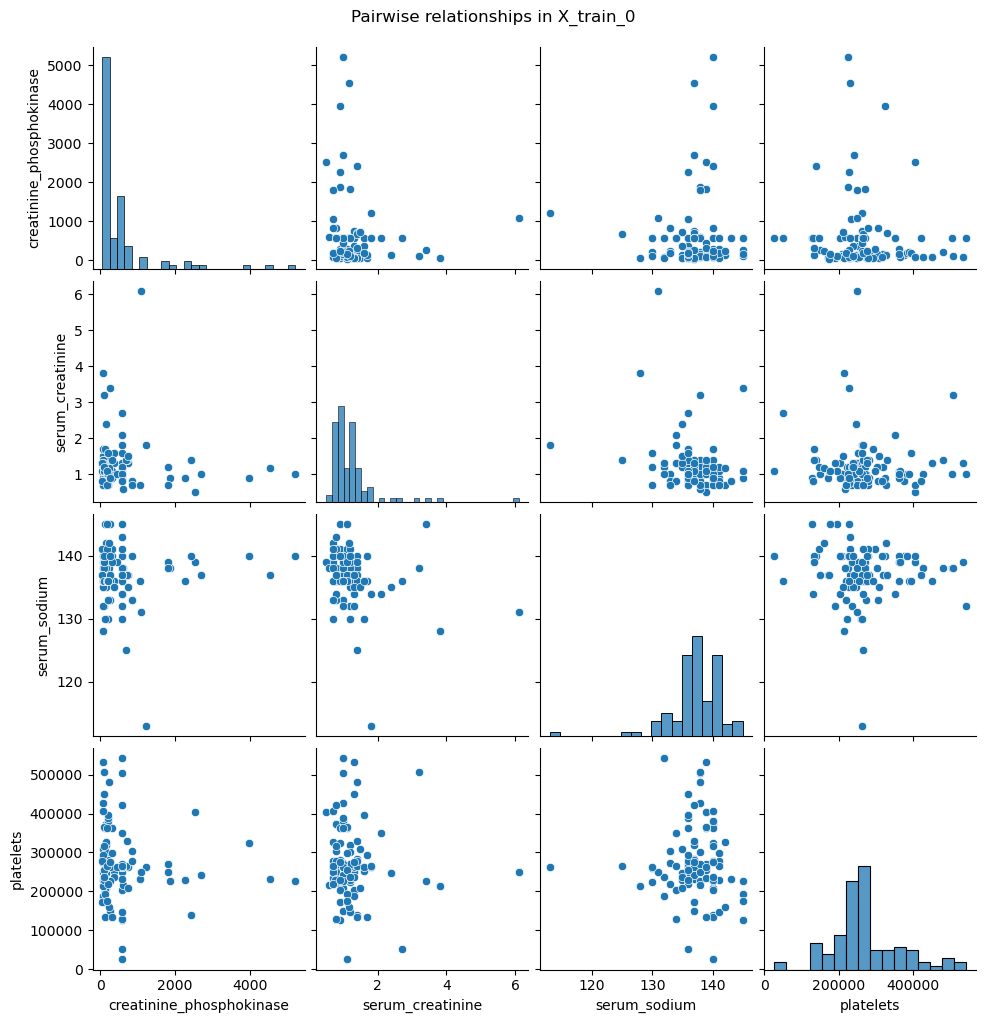

In [56]:
pairplot = sns.pairplot(X_train_0)

# Adjust the plot title and layout
plt.suptitle("Pairwise relationships in X_train_0", y=1.02)
plt.savefig("survived.pdf")
plt.show()



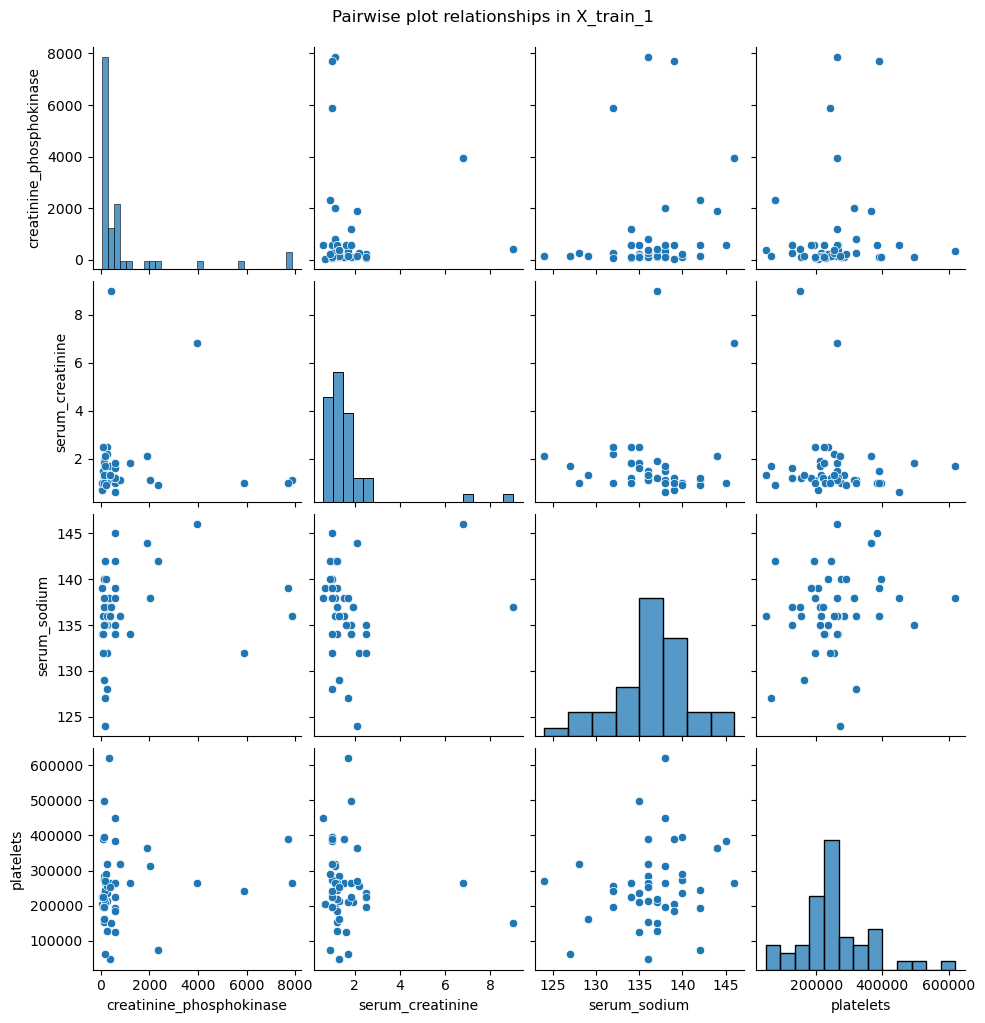

In [49]:
pairplot_dead = sns.pairplot(X_train_1, hue='category')

plt.suptitle("Pairwise plot relationships in X_train_1", y=1.02)
plt.savefig("not_survived.pdf")
plt.show()



In [60]:
#Here's my classifier ~(((df['serum_sodium'] > 130) & (df['serum_sodium'] < 144)) & (df['creatinine_phosphokinase'] < 1000))
X = patients.drop(columns=['DEATH_EVENT'])  # or any other column that's your target variable
y = patients['DEATH_EVENT']

# Split the data into training and testing sets (50/50 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



In [61]:
#apply classifier
predicted_labels = ~(((X_test['serum_sodium'] > 130) & (X_test['serum_sodium'] < 144)) & (X_test['creatinine_phosphokinase'] < 1000))
predicted_labels = predicted_labels.astype(int)


In [62]:
# Ensure y_test is in the correct format
y_test = y_test.astype(int)

# Calculate TP, FP, TN, FN
TP = ((predicted_labels == 1) & (y_test == 1)).sum()
FP = ((predicted_labels == 1) & (y_test == 0)).sum()
TN = ((predicted_labels == 0) & (y_test == 0)).sum()
FN = ((predicted_labels == 0) & (y_test == 1)).sum()

# Calculate TPR (sensitivity/recall) and TNR (specificity)
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0


In [64]:
print (TP, FP, TN, FN, TPR, TNR)

14 22 73 41 0.2545454545454545 0.7684210526315789


In [65]:
accuracy = (TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) != 0 else 0

In [66]:
print ("Accuracy: ", accuracy)

Accuracy:  0.58


Question2.6: Yeah, my simple classifier is more accurate than a coin flip, to my surprise.

In [67]:
#Question 3

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'label' is the column name for your target variable
X = patients.drop(columns=['DEATH_EVENT'])  # Replace 'label' with your actual target column name
y = patients['DEATH_EVENT']

# List of k values
k_values = [3, 5, 7]

# Dictionary to store accuracies for each k
accuracies = {}

for k in k_values:
    # Split the data into training and testing sets (50/50 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    
    # Initialize the k-NN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = knn.predict(X_test)
    
    # Compute the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    accuracies[k] = accuracy

# Output the accuracies for each k
print(accuracies)

{3: 0.64, 5: 0.64, 7: 0.6133333333333333}


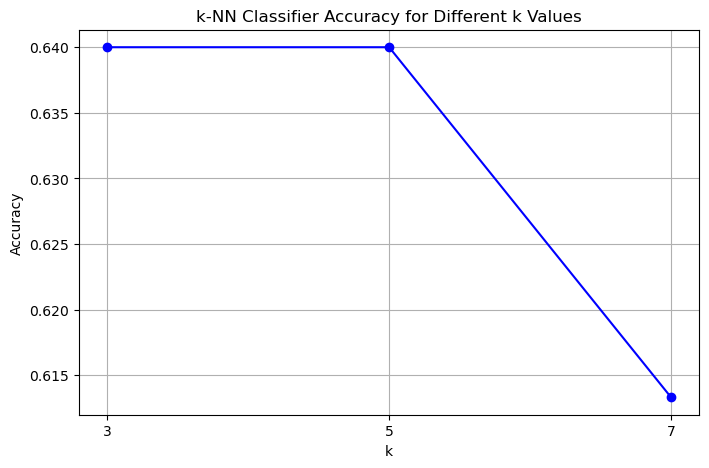

The optimal value of k (k*) is: 3


In [68]:
k_values = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Classifier Accuracy for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Determine the optimal value of k (k*), where the accuracy is maximum
optimal_k = k_values[accuracy_values.index(max(accuracy_values))]
print("The optimal value of k (k*) is:", optimal_k)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the k-NN classifier using the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_optimal.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_optimal = knn_optimal.predict(X_test)

# Calculate confusion matrix to get TP, FP, FN, TN
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate accuracy
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)

# Calculate TPR (sensitivity, recall) and TNR (specificity)
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0

# Output the performance metrics
print("Optimal k =", 3)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)
print("Accuracy:", accuracy_optimal)
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)


Optimal k = 3
True Positives (TP): 11
False Positives (FP): 10
True Negatives (TN): 85
False Negatives (FN): 44
Accuracy: 0.64
True Positive Rate (TPR): 0.2
True Negative Rate (TNR): 0.8947368421052632


In [71]:
accuracies = {}

for feature in features:
    # Drop the current feature from the dataset
    X_modified = patients.drop(columns=[feature, 'DEATH_EVENT'])  # Replace 'label' with your target variable
    y = patients['DEATH_EVENT']
    
    # Split the modified dataset into training and testing sets (50/50 split)
    X_train_modified, X_test_modified, y_train, y_test = train_test_split(X_modified, y, test_size=0.5, random_state=42)
    
    # Initialize the k-NN classifier using the optimal k value
    knn = KNeighborsClassifier(n_neighbors=3)
    
    # Train the classifier on the truncated X_train
    knn.fit(X_train_modified, y_train)
    
    # Predict the labels for the truncated X_test
    y_pred = knn.predict(X_test_modified)
    
    # Compute the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    accuracies[feature] = accuracy

# Output the accuracies for each scenario
for feature, acc in accuracies.items():
    print(f"Accuracy without the feature '{feature}': {acc:.4f}")

Accuracy without the feature 'creatinine_phosphokinase': 0.6533
Accuracy without the feature 'serum_creatinine': 0.6400
Accuracy without the feature 'serum_sodium': 0.6400
Accuracy without the feature 'platelets': 0.7333


In [72]:
from sklearn.linear_model import LogisticRegression

X = patients.drop(columns=['DEATH_EVENT'])  
y = patients['DEATH_EVENT']

# Split the data into training and testing sets (50/50 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression(max_iter=1000)  # max_iter may need adjustment for convergence

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logistic_regression.predict(X_test)

# Compute the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the logistic regression classifier on the test set: {accuracy:.4f}")

Accuracy of the logistic regression classifier on the test set: 0.7867


In [73]:
accuracies = {}

for feature in features:
    # Drop the current feature from the dataset
    X_modified = patients.drop(columns=[feature, 'DEATH_EVENT'])  
    y = patients['DEATH_EVENT']

    # Split the modified dataset into training and testing sets (50/50 split)
    X_train_modified, X_test_modified, y_train, y_test = train_test_split(X_modified, y, test_size=0.5, random_state=42)

    # Initialize the logistic regression classifier
    logistic_regression = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed for convergence

    # Train the classifier on the truncated X_train
    logistic_regression.fit(X_train_modified, y_train)

    # Predict the labels for the truncated X_test
    y_pred_modified = logistic_regression.predict(X_test_modified)

    # Compute the accuracy
    accuracy_modified = accuracy_score(y_test, y_pred_modified)

    # Store the accuracy in the dictionary
    accuracies[feature] = accuracy_modified

# Output the accuracies for each scenario
for feature, acc in accuracies.items():
    print(f"Accuracy without the feature '{feature}': {acc:.4f}")

Accuracy without the feature 'creatinine_phosphokinase': 0.7600
Accuracy without the feature 'serum_creatinine': 0.8133
Accuracy without the feature 'serum_sodium': 0.7733
Accuracy without the feature 'platelets': 0.8333
